# The advantages of support vector machines are:

Effective in high dimensional spaces.

Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.



The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.


SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).
The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.



# Classification
SVC, NuSVC and LinearSVC are classes capable of performing multi-class classification on a dataset.



SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept keyword kernel, as this is assumed to be linear. It also lacks some of the members of SVC and NuSVC, like support_.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of size [n_samples, n_features] holding the training samples, and an array y of class labels (strings or integers), size [n_samples]:

In [6]:
>>> from sklearn import svm
>>> X = [[0, 0], [1, 1]]
>>> y = [0, 1]
>>> clf = svm.SVC()
>>> clf.fit(X, y)  
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

# multi class function

SVC and NuSVC implement the “one-against-one” approach (Knerr et al., 1990) for multi- class classification. If n_class is the number of classes, then n_class * (n_class - 1) / 2 classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the decision_function_shape option allows to aggregate the results of the “one-against-one” classifiers to a decision function of shape (n_samples, n_classes):




In [20]:

>>> X = [[0], [1], [2], [3]]
>>> Y = [0, 1, 2, 3]
>>> clf = svm.SVC(decision_function_shape='ovo')
>>> clf.fit(X, Y) 



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
>>> dec = clf.decision_function([[1]])
>>> dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [22]:
# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [23]:
#On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. 
#If there are only two classes, only one model is trained:


lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In problems where it is desired to give more importance to certain classes or certain individual samples keywords class_weight and sample_weight can be used.

# Regression¶


The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers linear kernels, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See Implementation details for further details.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

In [25]:
>>> from sklearn import svm
>>> X = [[0, 0], [2, 2]]
>>> y = [0.5, 2.5]
>>> clf = svm.SVR()
>>> clf.fit(X, y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
clf = svm.NuSVR()
>>> clf.fit(X, y)

NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Fit regression model
#linear and non linear 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

The kernel function can be any of the following:

linear:


polynomial: d is specified by keyword degree, r by coef0.


rbf: is specified by keyword gamma, must be greater than 0.


sigmoid  where r is specified by coef0

In [27]:
clf = svm.LinearSVR()
>>> clf.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [2]:
clf.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

# What is the goal of the Support Vector Machine (SVM)?
The goal of a support vector machine is to find  the optimal separating hyperplane which maximizes the margin of the training data.

# If it is just a line, why do we call it an hyperplane ?
Even though we use a very simple example with data points laying in R2 the support vector machine can work with any number of dimensions !

An hyperplane is a generalization of a plane.

in one dimension, an hyperplane is called a point

in two dimensions, it is a line

in three dimensions, it is a plane

in more dimensions you can call it an hyperplane

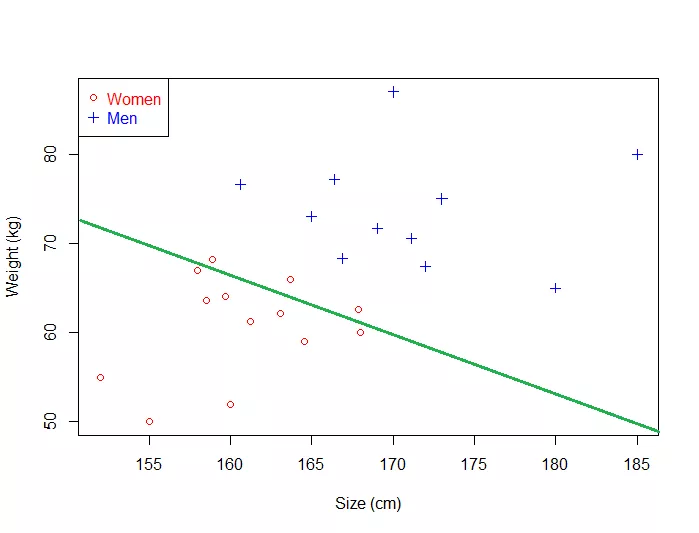

This time, it makes some mistakes as it wrongly classify three women. Intuitively, we can see that if we select an hyperplane which is close to the data points of one class, then it might not generalize well.

So we will try to select an hyperplane as far as possible from data points from each category:

This means that the optimal hyperplane will be the one with the biggest margin.

That is why the objective of the SVM is to find  the optimal separating hyperplane which maximizes the margin of the training data.

# Mathematics

# specification

In [ ]:
if "large number Feature" and "less data few thousand"
         
            1.Support Vector Machines, which uses a geometrical approach.
            
             Go for SVM if you have large number of features and number of observations are 
             not a limitation for available resources and time
            
             for text target (text classification nlp)
                
             When the classes are not linearly separable, 
             a kernel trick can be used to map a non-linearly 
             separable space into a higher dimension linearly separable space.

# metric


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
# Now measure its performance with the test data
clf.score(X_test, y_test)
